# День 01 – Дескриптивный и разведочный анализ данных

Время познакомиться с данными получше. Когда начинаешь дескриптивный и разведочный анализ, никогда не знаешь, что найдешь. И найдешь ли что-то интересное вообще? Посмотрим, удастся ли нам найти какие-то интересные инсайты на этом этапе анализа данных.

## 0. Импорт библиотек

In [ ]:
import pandas as pd

## 1. Загрузка данных

Сегодня мы поработаем с двумя версиями датасета. Немного – с версией, где нет пропусков и есть новые категориальные признаки, и более плотно – с версией, где есть пропуски, но при этом есть и данные в их исходном виде. Иметь разные версии датасета – это хорошая практика: есть возможность вернуться к исходным данным или к любому другому их промежуточному состоянию.

In [ ]:
df_old = pd.read_csv('путь к датасету с пропусками')

In [ ]:
df_new = pd.read_csv('путь к датасету без пропусков')

## 2. Полезные команды

1. Подсчитать **количество значений у признака**:

In [ ]:
df.PACK.value_counts()

102    116986
k01     77083
o01     50478
105     44936
107     27952
103     24860
104      6776
301      4208
101      1816
109        86
m01         7
108         2
Name: PACK, dtype: int64

2. **Нарисовать график**, используя метод `.plot` и соответствующее название графика:

<AxesSubplot:>

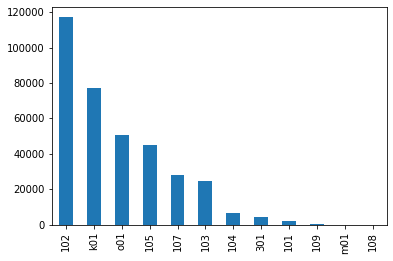

In [ ]:
df.PACK.value_counts().plot.bar()

3. Получить **подмножество данных, удовлетворяющее нескольким условиям**:

In [ ]:
df.loc[(df['PACK'] == '102') & (df['AGE'] > 1050)][['PACK','AGE']]

,PACK,AGE
267158,102,1104
270645,102,1092


4. Сделать **сводную таблицу**:

In [ ]:
table = pd.pivot_table(df, values='ID', index=['APP_CAR'], columns='PACK', aggfunc='count')
table

PACK,101,102,103,104,105,107,109,301,k01,m01,o01
APP_CAR,,,,,,,,,,,
n,339,10124,1897,465,5421,2490,7,374,6987,1,4738
y,239,7143,1829,608,3519,1692,11,288,5563,1,3520


И на ее основе построить график.

<AxesSubplot:xlabel='APP_CAR'>

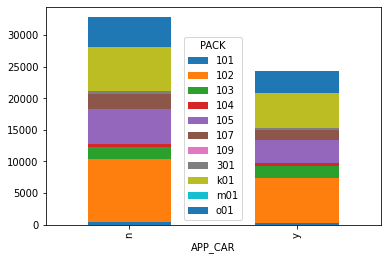

In [ ]:
table.plot.bar(stacked=True)

## 3. Самостоятельная часть

Ниже вам нужно самим по инструкции задания провести дескриптивный и разведочный анализ данных.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
data_old = pd.read_csv('/Users/DelsinRowe/Desktop/day01/master_&_BD_01/bank_data_train_d01_1.csv')

In [5]:
data_new = pd.read_csv('/Users/DelsinRowe/Desktop/day01/master_&_BD_01/bank_data_train_d01_2.csv')

<AxesSubplot:ylabel='TARGET'>

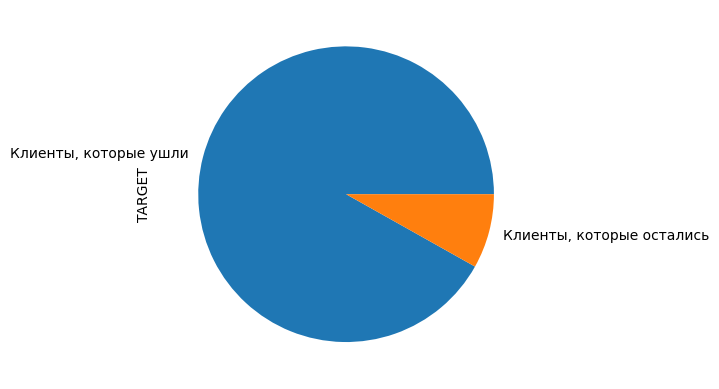

In [6]:
data_old["TARGET"].value_counts().plot.pie(labels=["Клиенты, которые ушли","Клиенты, которые остались"],autopct='%1.0f%%')

<AxesSubplot:>

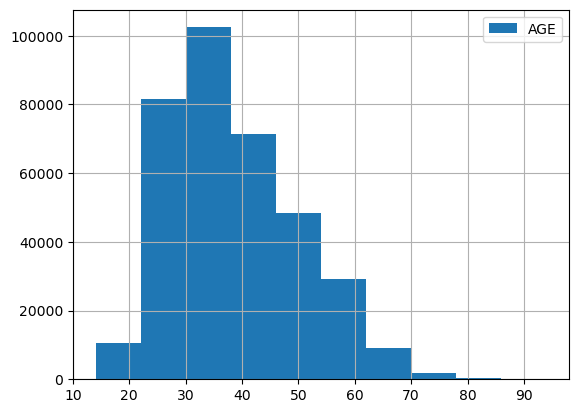

In [6]:
data_old.loc[:]["AGE"].div(12).hist(legend=True)

In [8]:
sd = pd.Series(data_old["REST_AVG_CUR"]).sum()/len(data_old.REST_AVG_CUR)
sd

66358.54452654577

In [7]:
data_old.REST_AVG_CUR.median()

16289.253091666651

In [8]:
data_old.REST_AVG_CUR.std()

187859.77074739244

<AxesSubplot:>

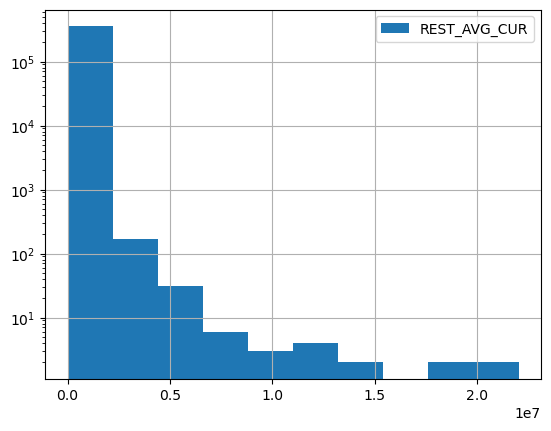

In [9]:
data_old.loc[:]["REST_AVG_CUR"].hist(log=True,legend=True)

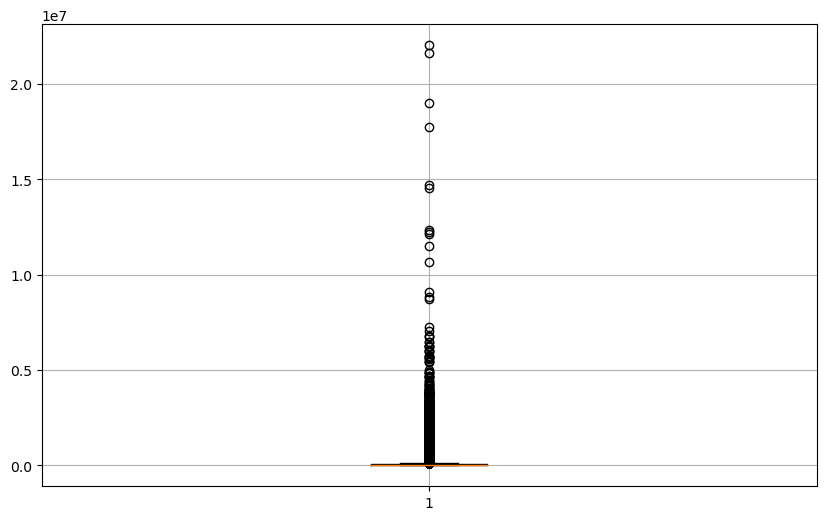

In [11]:
dfig, ax= plt.subplots(figsize=(10,6))
ax.boxplot(data_old['REST_AVG_CUR'])

ax.grid()
plt.show()

<AxesSubplot:>

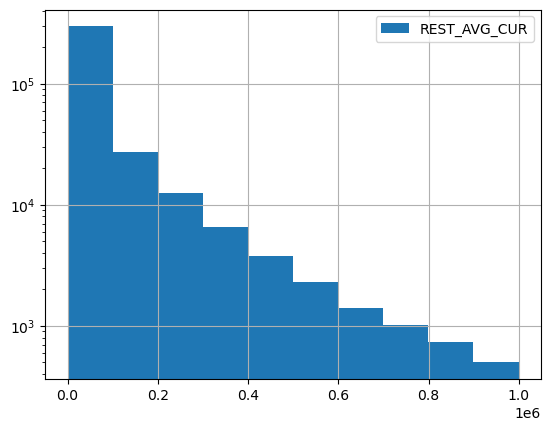

In [13]:
data_old.loc[data_old["REST_AVG_CUR"]<1000000]["REST_AVG_CUR"].hist(log=True,legend=True)

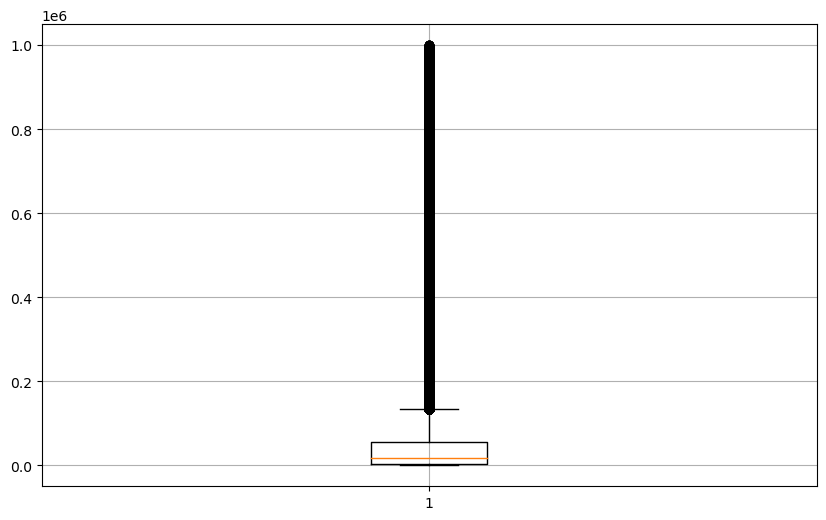

In [14]:
fig, ax= plt.subplots(figsize=(10,6))
ax.boxplot(data_old.loc[data_old["REST_AVG_CUR"]<1000000]["REST_AVG_CUR"])
#ax.set_ylim(0,150000)
ax.grid()
plt.show()

In [16]:
full_sum = data_old["REST_AVG_CUR"].sum() + data_old["REST_AVG_PAYM"].sum()
full_sum

26094871710.901207

<AxesSubplot:>

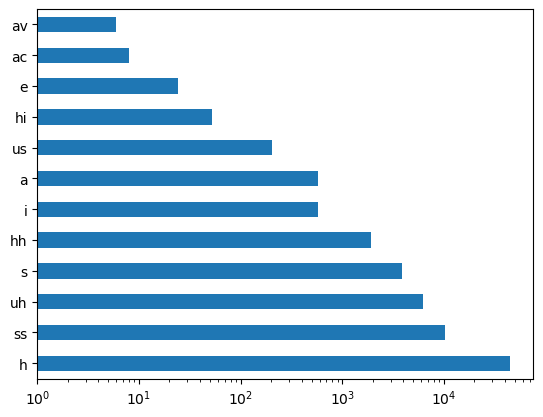

In [17]:
data_old.APP_EDUCATION.value_counts().plot(kind='barh', log=True)

In [18]:
pt=pd.pivot_table(data_old,values='ID', index=['PACK'], columns='TARGET', aggfunc='count')
pt['sum_cols'] = pt.sum(axis=1)
pt = pt.sort_values('sum_cols' , ascending=False)

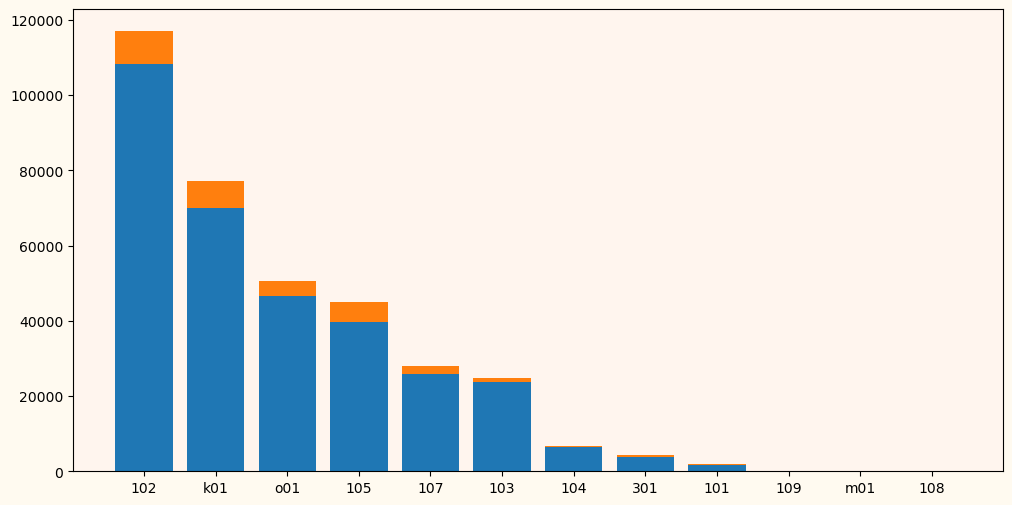

In [19]:
x = pt.index
data_1 = pt[0]
data_2 = pt[1]

fig, ax = plt.subplots()

ax.bar(x, data_1)
ax.bar(x, data_2, bottom = data_1)

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

<AxesSubplot:xlabel='APP_REGISTR_RGN_CODE'>

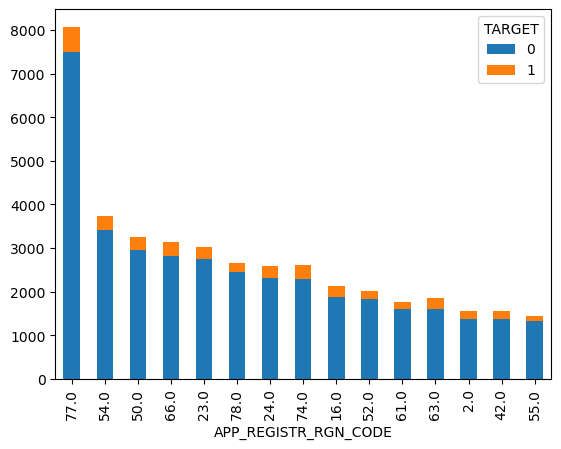

In [21]:
pt=pd.pivot_table(data_old,values='ID', index=['APP_REGISTR_RGN_CODE'], columns='TARGET', aggfunc='count')
pt = pt.sort_values(by=[0,1], ascending=False)

pt.iloc[0:15].plot.bar(stacked=True)

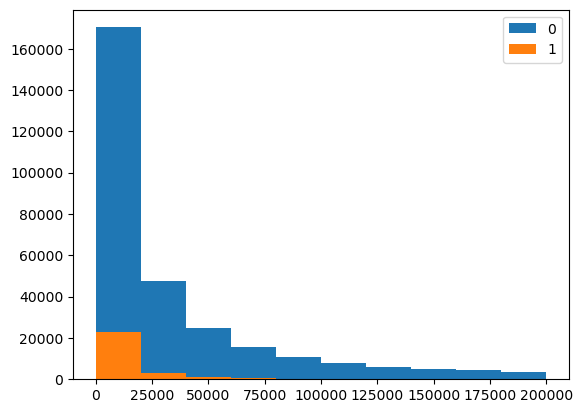

In [22]:
data_old.loc[(data_old["TARGET"]==0) & (data_old["REST_AVG_CUR"]<200000)]["REST_AVG_CUR"].hist(grid=False, legend=True)
data_old.loc[(data_old["TARGET"]==1) & (data_old["REST_AVG_CUR"]<200000)]["REST_AVG_CUR"].hist(grid=False, legend=True)
plt.legend(['0', '1'])

In [29]:
data_old.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355190 entries, 0 to 355189
Data columns (total 115 columns):
 #    Column                       Dtype  
---   ------                       -----  
 0    ID                           int64  
 1    CR_PROD_CNT_IL               int64  
 2    AMOUNT_RUB_CLO_PRC           float64
 3    PRC_ACCEPTS_A_EMAIL_LINK     float64
 4    APP_REGISTR_RGN_CODE         float64
 5    PRC_ACCEPTS_A_POS            float64
 6    PRC_ACCEPTS_A_TK             float64
 7    TURNOVER_DYNAMIC_IL_1M       float64
 8    CNT_TRAN_AUT_TENDENCY1M      float64
 9    SUM_TRAN_AUT_TENDENCY1M      float64
 10   AMOUNT_RUB_SUP_PRC           float64
 11   PRC_ACCEPTS_A_AMOBILE        float64
 12   SUM_TRAN_AUT_TENDENCY3M      float64
 13   CLNT_TRUST_RELATION          object 
 14   PRC_ACCEPTS_TK               float64
 15   PRC_ACCEPTS_A_MTP            float64
 16   REST_DYNAMIC_FDEP_1M         float64
 17   CNT_TRAN_AUT_TENDENCY3M      float64
 18   CNT_ACCEPTS_TK        

In [63]:
#plt.hist([data_old[data_old['APP_CAR'] == 'y']['REST_AVG_CUR'],data_old[data_old['APP_DRIVING_LICENSE'] == 'n']['REST_AVG_CUR']],

#stacked=True)
data_old.loc[(data_old["APP_CAR"]=='y') & (data_old["APP_DRIVING_LICENSE"]=='n')]["ID"].count()

11371

In [64]:
#plt.hist([data_old[data_old['APP_CAR'] == 'n']['APP_CAR'],data_old[data_old['APP_DRIVING_LICENSE'] == 'y']['APP_CAR']],

#stacked=True)
data_old.loc[(data_old["APP_CAR"]=='n') & (data_old["APP_DRIVING_LICENSE"]=='y')]["ID"].count()

7883

In [65]:
#plt.hist([data_old[data_old['APP_CAR'] == 'y']['APP_CAR'],data_old[data_old['APP_DRIVING_LICENSE'] == 'y']['APP_CAR']],

#stacked=True)
data_old.loc[(data_old["APP_CAR"]=='y') & (data_old["APP_DRIVING_LICENSE"]=='y')]["ID"].count()

13042

In [62]:
#k = np.corrcoef(data_old['CLNT_SALARY_VALUE'],data_old['AVG_PCT_DEBT_TO_DEAL_AMT'],rowvar=True)
#
kk=data_old['CLNT_SALARY_VALUE'].corr(data_old['REST_AVG_CUR'])
kk

0.03836433319062563

In [31]:

cor_m = data_old.corr()["CLNT_SALARY_VALUE"]

In [32]:
cor_m.sort_values(ascending=False)[1:4]

LDEAL_YQZ_CHRG             0.933165
LDEAL_DELINQ_PER_MAXYQZ    0.406189
TURNOVER_PAYM              0.257918
Name: CLNT_SALARY_VALUE, dtype: float64

In [33]:
len(data_old.index)

355190

In [34]:
data_new.CLNT_SALARY_VALUE_GROUP.unique()

array(['неизвестна', 'низкая', 'средняя', 'высокая'], dtype=object)

In [36]:
pt=pd.pivot_table(data_new.loc[data_new.CLNT_SALARY_VALUE_GROUP != 'неизвестна'],values='ID', index=['CLNT_SALARY_VALUE_GROUP'], columns='TARGET', aggfunc='count')

<AxesSubplot:xlabel='CLNT_SALARY_VALUE_GROUP'>

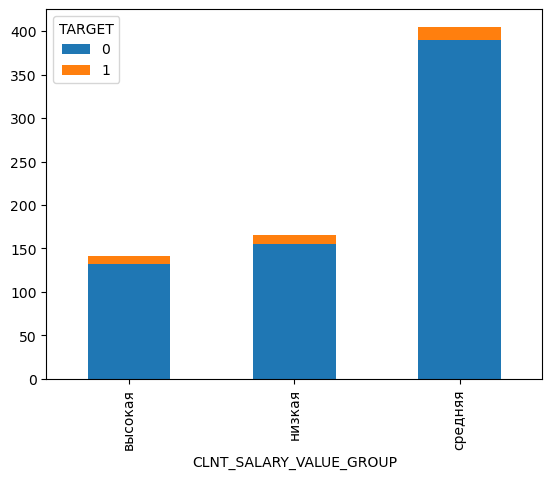

In [37]:
pt.plot.bar(stacked=True)